<a href="https://colab.research.google.com/github/VishaliTk/Customer_conversion-_prediction-/blob/main/customer_conver_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imporrting all the packages

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning packages

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset_fin.csv")
print("shape",df.shape)
df.head()

shape (45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


Data cleaning

In [ ]:
# display the datatype of all columns
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
# finding the missing the values,and treat it otherwise it make wrong prediction or classification
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
# statistically checking any outliers present or not
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Exploratory data analysis

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

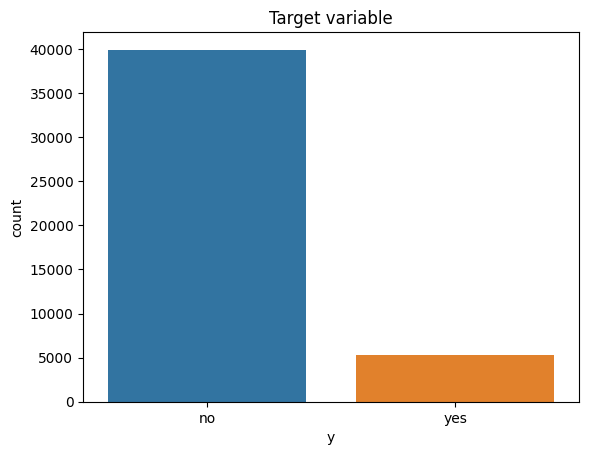

In [ ]:
sns.countplot(x='y',data=df)
plt.title("Target variable")
plt.show()

In [ ]:
# displaying the presentage in target variable
print("percentage of no and yes\n",df['y'].value_counts()/len(df)*100)

percentage of no and yes
 no     88.30152
yes    11.69848
Name: y, dtype: float64


 The target variable is 89:11 highly imbalanced dataset

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


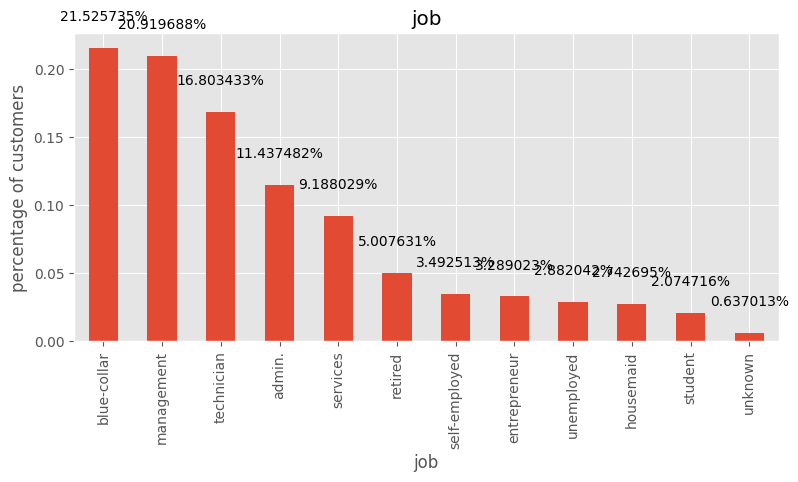

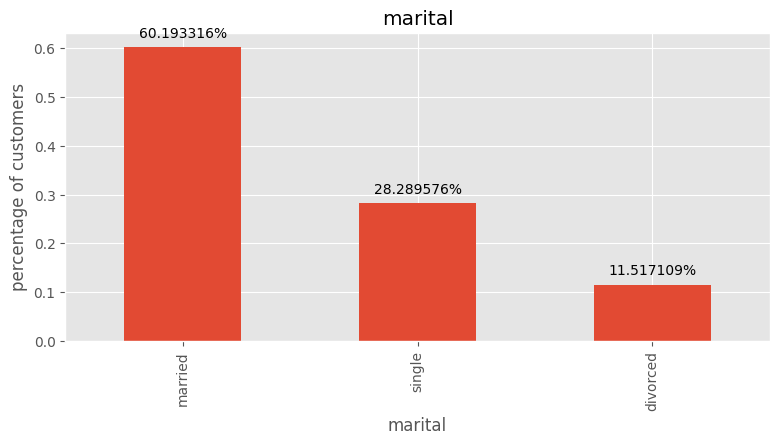

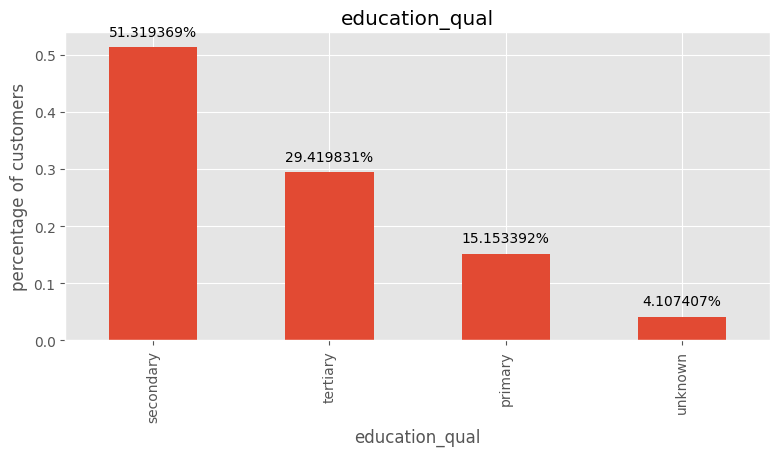

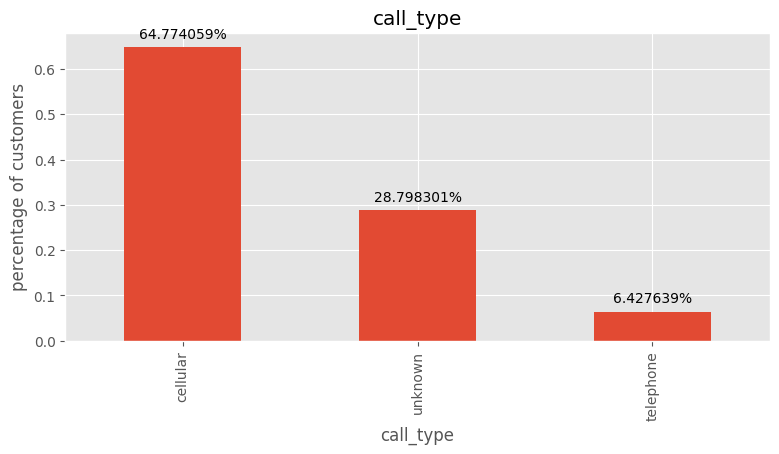

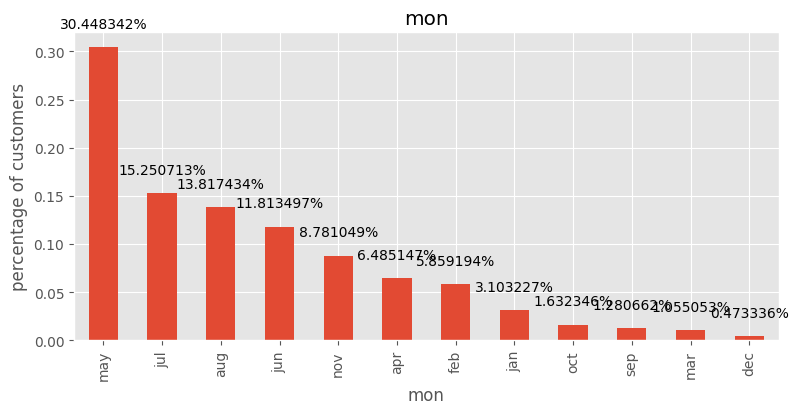

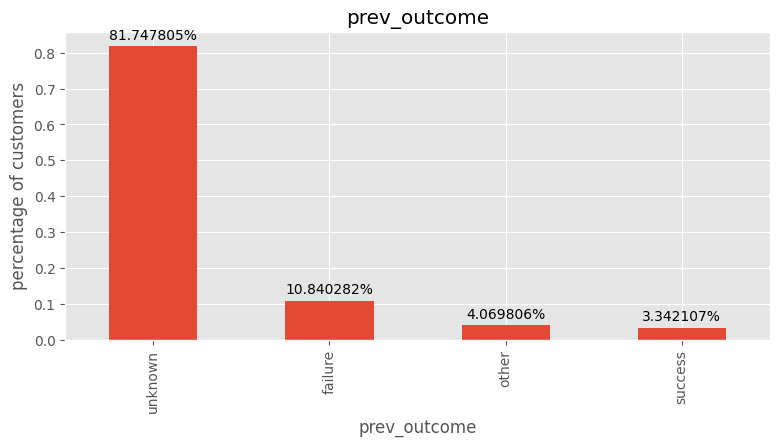

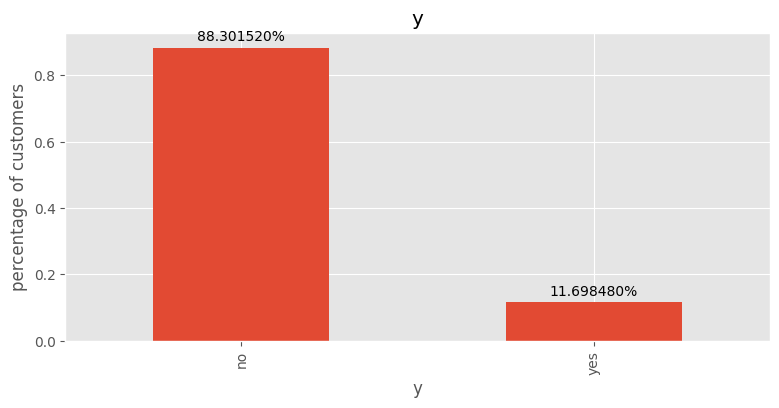

In [ ]:
# displaying the categorical variable
cat_var = df.select_dtypes(include=["object"]).columns
print(cat_var)
# plotting bar chart
plt.style.use("ggplot")
for column in cat_var:
  plt.figure(figsize=(20,4))
  ax=plt.subplot(121)
  df[column].value_counts(normalize=True).plot(kind="bar")
  plt.xlabel(column)
  plt.ylabel("percentage of customers")
  plt.title(column)

  for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+0.02,f"{p.get_height()*100:1f}%",ha="center")

Observation of the above visuvallization:
1) # The top 3 profession are Blue_collar job,Mangament,Technicians


2) # The large number of customer are married

3) # The customers use cellular type mostly

4) # many customers contacted in may month

5) # very less number of customers are there who successfully converted previously

6) # The customers are mostly secondary educators

7) # It is highly imbalanced dataset

8) # missing values in some column have been represented as unknown,its missing data


In [ ]:
cate_var=["job","education_qual"]
for column in cate_var:
  mode=df[column].mode()[0]
  df[column]=df[column].replace("unknown",mode)

In [ ]:
# displaying the numerical variable
num_var=df.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


<ipython-input-18-15aa04b1163a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],kde=True)
<ipython-input-18-15aa04b1163a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],kde=True)
<ipython-input-18-15aa04b1163a>:6: UserWarning: 

`distplot` is a deprecated function and wi

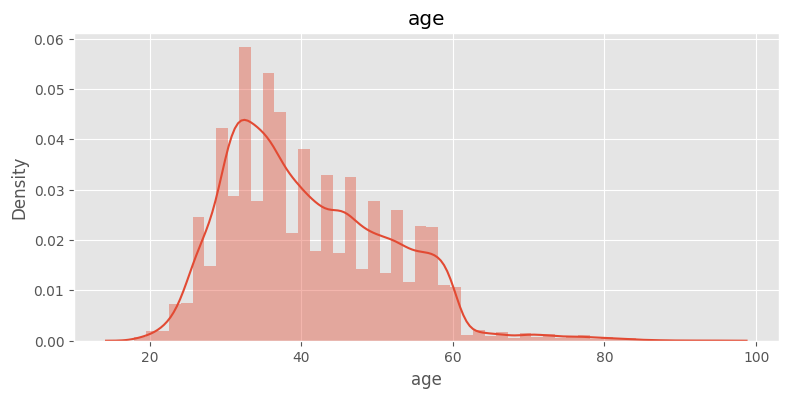

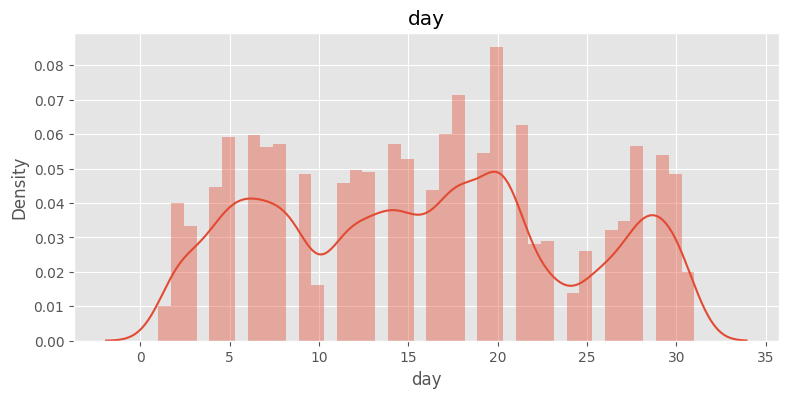

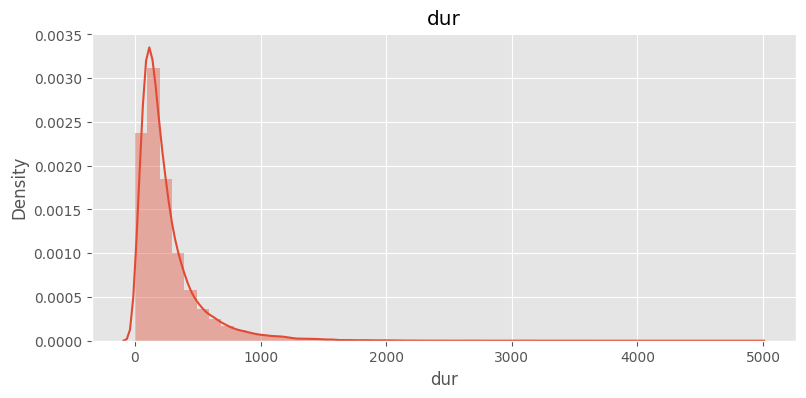

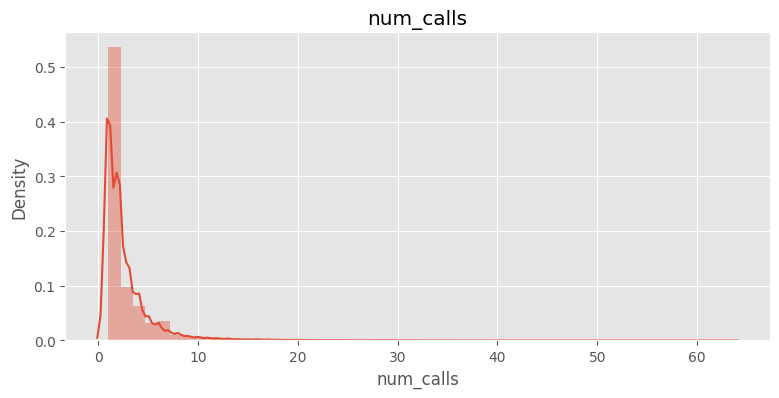

In [ ]:
# plotting histogram for numerical variable
plt.style.use("ggplot")
for column in["age","day","dur","num_calls"]:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.distplot(df[column],kde=True)
  plt.title(column)

We able to see from the histogram ,feature age,dur,num_calls are highly skewed and this due to presence of outliers .

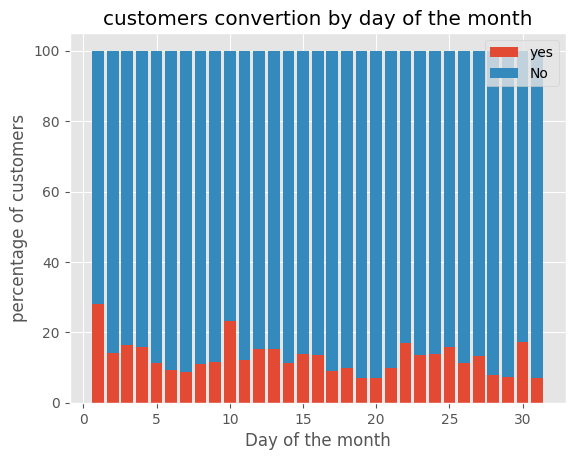

In [ ]:
day_counts=df.groupby("day")['y'].value_counts(normalize=True)*100
yes_counts=day_counts[:,"yes"]
no_counts=day_counts[:,"no"]


plt.bar(day_counts.index.levels[0],yes_counts,label="yes")
plt.bar(day_counts.index.levels[0],no_counts,bottom=yes_counts,label="No")
plt.xlabel("Day of the month")
plt.ylabel("percentage of customers")
plt.title("customers convertion by day of the month")
plt.legend()
plt.show()

Observation of the above plot:

1,10,30 are the days the customers said "yes"

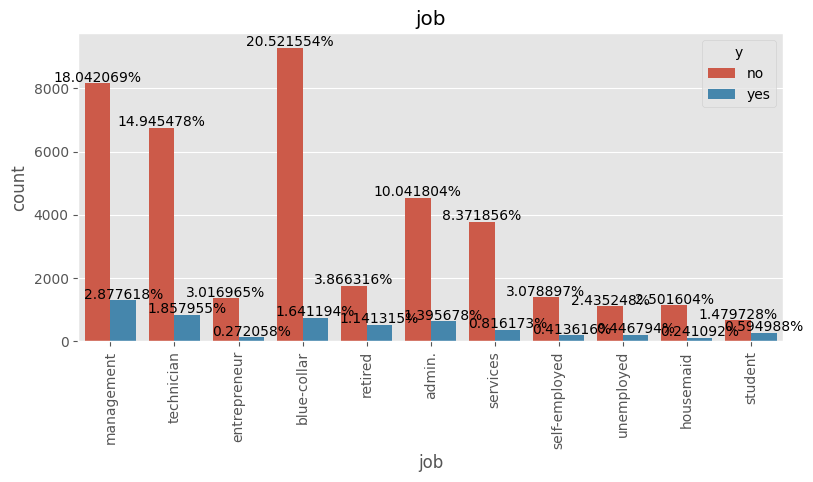

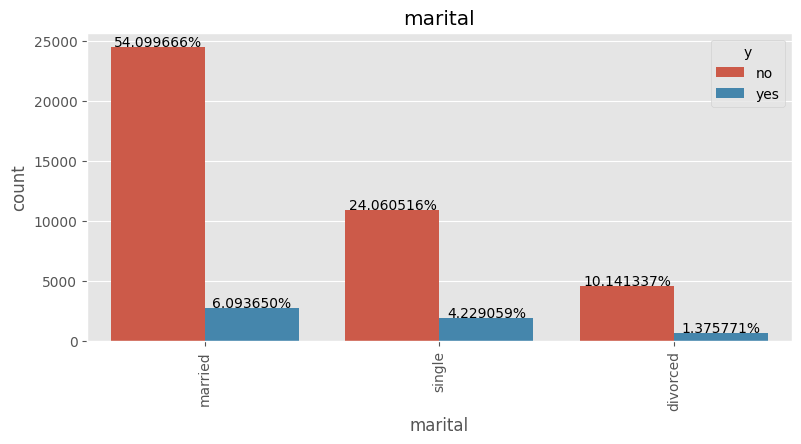

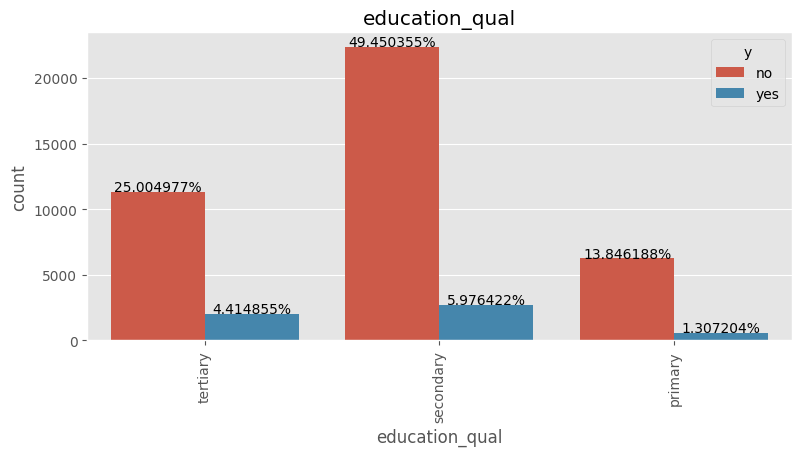

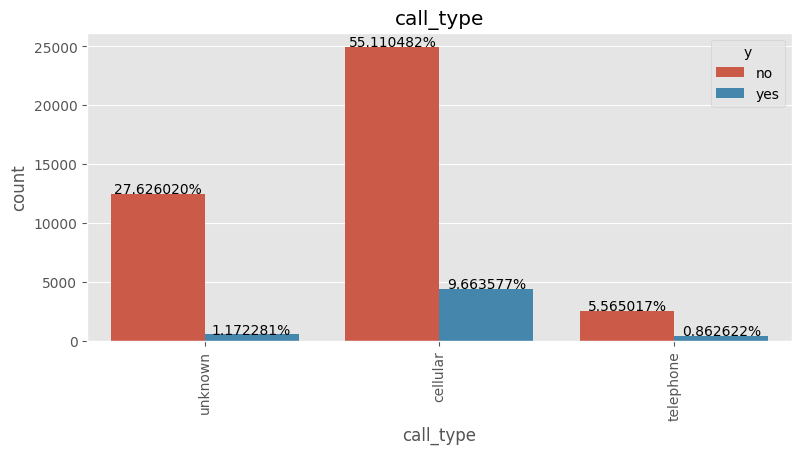

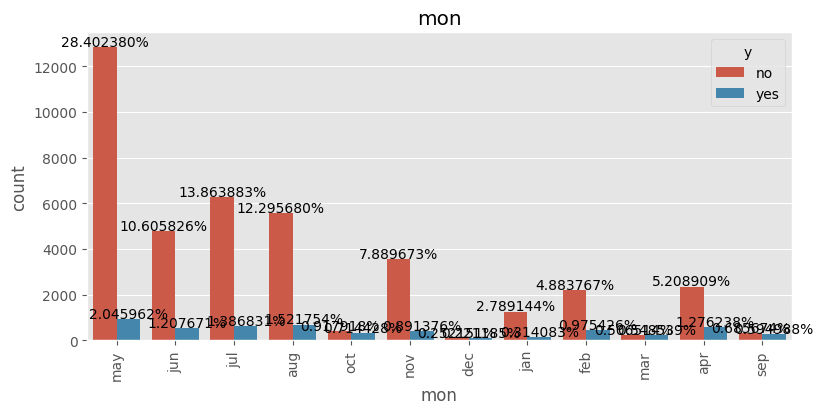

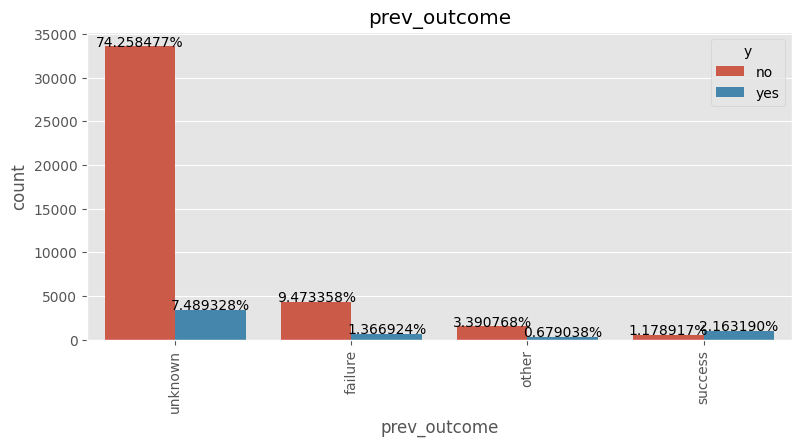

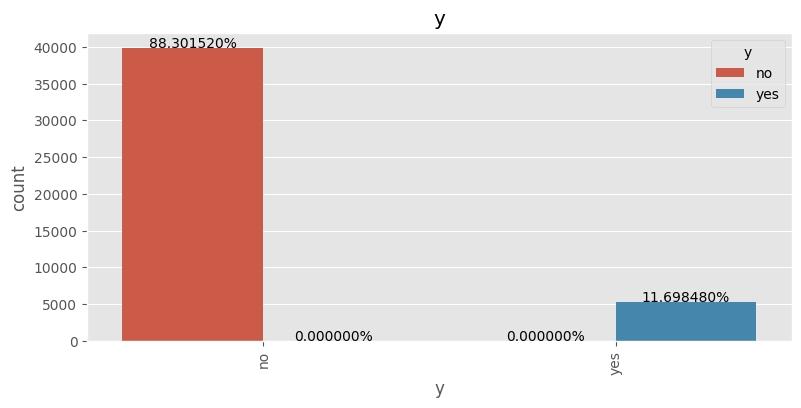

In [ ]:
plt.style.use("ggplot")
for column in cat_var:
  plt.figure(figsize=(20,4))
  ax=plt.subplot(121)
  sns.countplot(x=column,hue="y",data=df)
  plt.title(column)
  plt.xticks(rotation=90)

  for p in ax.patches:
    height=p.get_height()
    total=sum([p.get_height() for p in ax.patches if p.get_x()==p.get_x()])
    ax.text(p.get_x()+p.get_width()/2,height+50,f"{height/total*100:1f}%",ha="center")
  plt.show()

Observation of the above visuallization:

1)# customers having management jobs from the majority amongst those who have converted most

2)# married most of them converted

3)# secondary education qualified are converted most

4)# cell phones should be the preferred most of conact for contacting customers

5)# may month should be the prefered month to contact

# Handaling the outliers

* outliers cause significant impact on the mean and variance.it becomes necessary to treat the outliers



In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
# compute interquantile range to calculate the boundaries
lower_boundries=[]
upper_boundries=[]
for i in["age","dur","day","num_calls"]:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bound=df[i].quantile(0.25)-(1.5*IQR)
  upper_bound=df[i].quantile(0.75)+(1.5*IQR)

  print(i,":",lower_bound,",",upper_bound)
  lower_boundries.append(lower_bound)
  upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [ ]:
# replace all the outliers which is greater then upper boundary by upper boundary
j=0
for i in ["age","dur","day","num_calls"]:
  df.loc[df[i]>upper_boundries[j],i]=int(upper_boundries[j])
  j=j+1

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,15.806419,234.939307,2.392228
std,10.379659,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.000000,31.000000,643.000000,6.000000


After replacing the outliers with upper boundary the maximum values has been changed without impacting any other parameters like mean,standard deviation and quartiles

# Encoding categorical Features

In [ ]:
# 'y' target variable
df.replace({'y':{'yes':1,'no':0}},inplace=True)

<ipython-input-26-3a803c8ab7f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

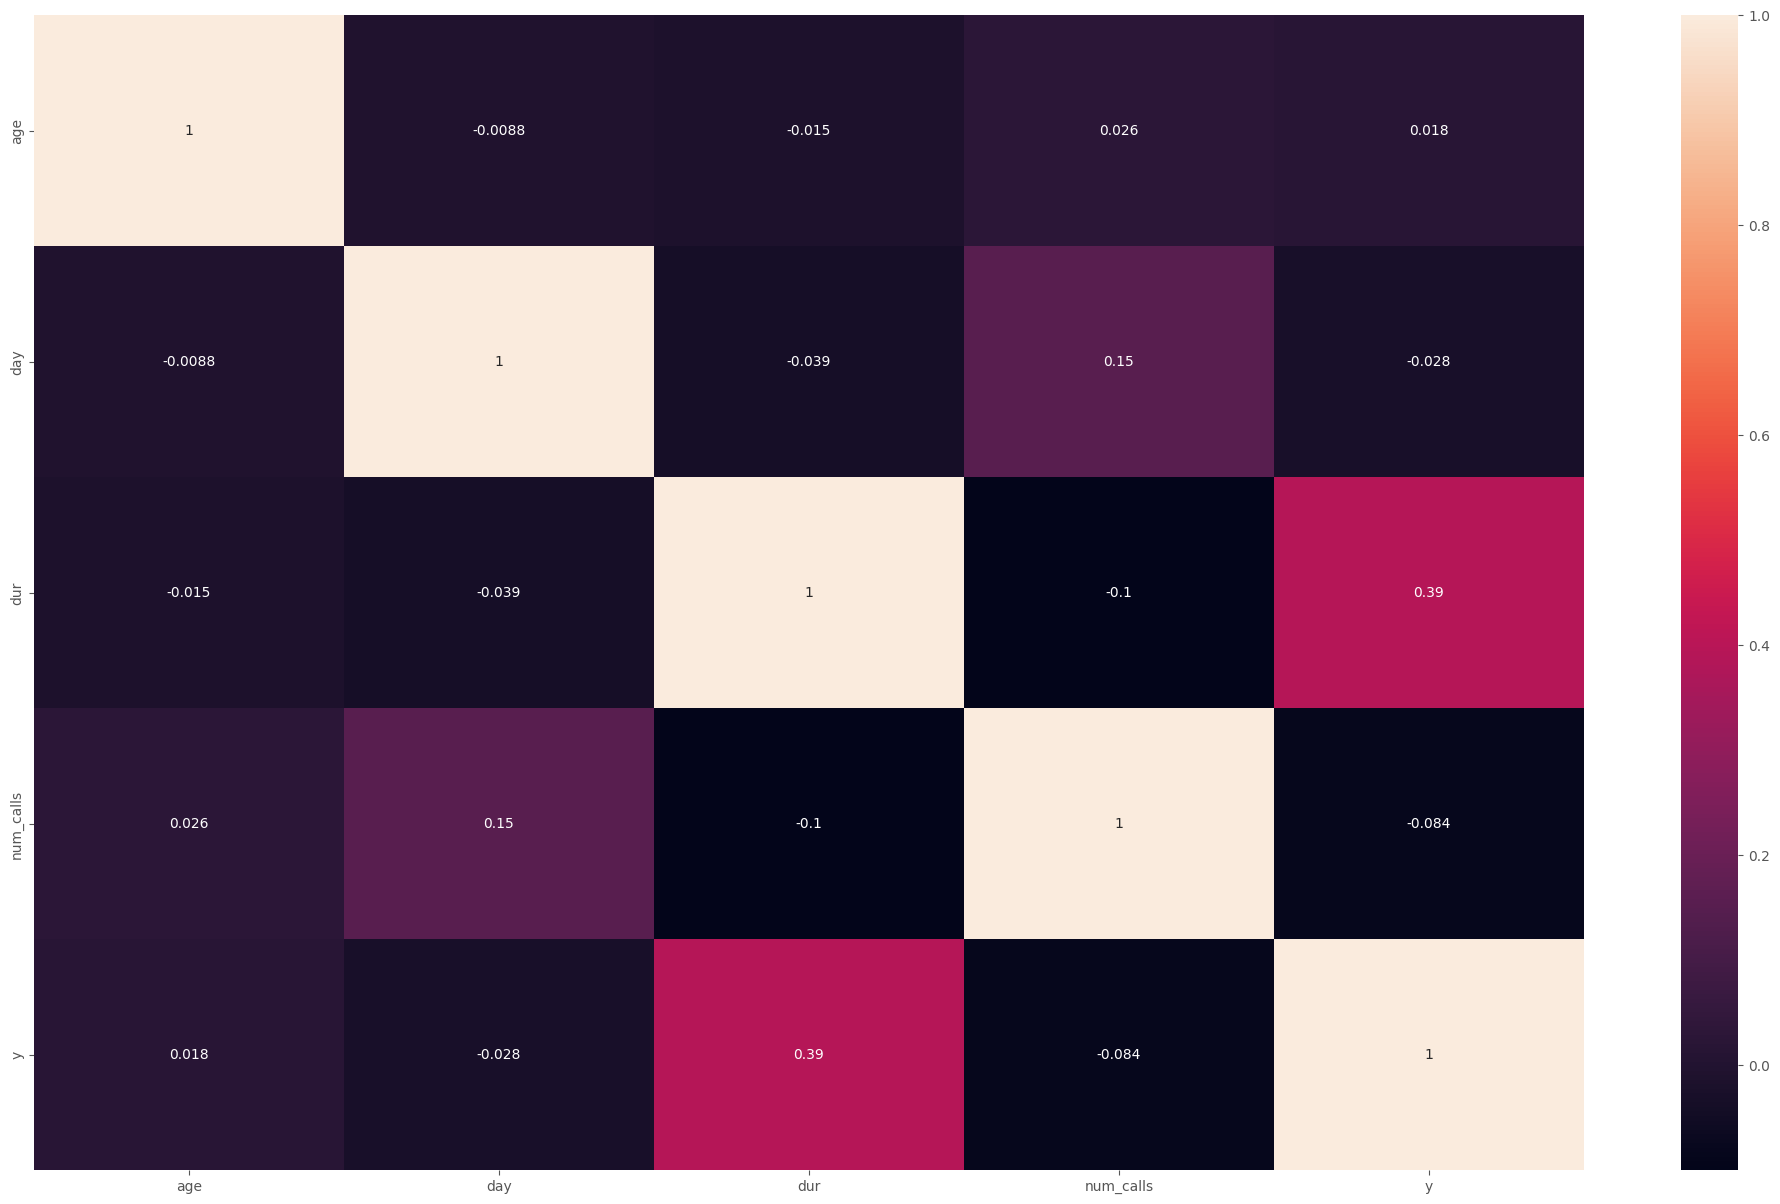

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
cat_var=df.select_dtypes(include=["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


In [ ]:
for i in cat_var:
  print(i,":",df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [ ]:
def encoding_data(df,col):
  for i in col:
    df_dummies=pd.get_dummies(df[i],prefix=i)
    df = pd.concat([df,df_dummies],axis=1)
    df.drop([i],inplace=True,axis=1)

  return df

In [ ]:
columns=["call_type","prev_outcome","marital","job"]
df=encoding_data(df,columns)

In [ ]:
# month column
months=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

df["mon"] = df["mon"].apply(
    lambda x:months.index(x)+1
)

In [ ]:
# education_qual
df.replace({"education_qual":{"tertiary":1,"secondary":2,"primary":3}},inplace=True)

# Spliting dataset

In [ ]:
p=df.drop(["y"],axis=1)
q=df["y"]

In [ ]:
# define SMOTETomek object with 0.75 sampling strategy
smote_tomek=SMOTETomek(sampling_strategy=0.75)

In [ ]:
# apply SMOTETomek oversampling to training data
X,y=smote_tomek.fit_resample(p,q)
print(y.value_counts())

0    39471
1    29490
Name: y, dtype: int64


splitting resampled data in train and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# scalling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

* 1) Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train,y_train)
predicted = lr_model.predict(X_test)
conf = confusion_matrix(y_test,predicted)

print("The accuracy of Logistic Regression is: ", accuracy_score(y_test,predicted)*100,"%")
print("The aurroc_auc_score of Logistic Regression is: ",roc_auc_score(y_test,lr_model.predict_proba(X_test)[:,1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:,1]
log_reg_auc=roc_auc_score(y_test,log_reg_y_pred_prob)

The accuracy of Logistic Regression is:  92.08629932331488 %
The aurroc_auc_score of Logistic Regression is:  0.9761532704379764


# Randam Forest

In [ ]:
rf_model=RandomForestClassifier(n_estimators = 100,random_state=0)
rf_model.fit(X_train,y_train)
predicted = rf_model.predict(X_test)
print("The accuracy of random forest is :",accuracy_score(y_test,predicted.round())*100,"%")
print("The aurroc_auc_score of random forest is:",roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:,1]
dt_fpr,dt_tpr,_ = roc_curve(y_test,dt_y_pred_prob)
dt_auc = roc_auc_score(y_test,dt_y_pred_prob)

The accuracy of random forest is : 93.8790754899376 %
The aurroc_auc_score of random forest is: 0.9863949272530848


# XGBOOSt

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train,y_train)
predicted = xgb_model.predict(X_test)

print("The accuracy of X Gradient Boosting is:",accuracy_score(y_test,predicted)*100,"%")
print("The aurroc_auc_score of Gradient Boosting is:",roc_auc_score(y_test,xgb_model.predict_proba(X_test)[:,1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test,xgb_y_pred_prob)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


The accuracy of X Gradient Boosting is: 93.589067580631 %
The aurroc_auc_score of Gradient Boosting is: 0.9861991657382317


# K Nearest Neighbour

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value:",i,"Train score:",knn.score(X_train,y_train),"cross value accuracy:",np.mean(cross_val_score(knn,X_test,y_test,cv=10)))


K value: 1 Train score: 0.9998701383027077 cross value accuracy: 0.91145968442805
K value: 2 Train score: 0.9578165919961907 cross value accuracy: 0.9158093242434191
K value: 3 Train score: 0.9563231824773283 cross value accuracy: 0.9174792290310745
K value: 4 Train score: 0.9458693158452914 cross value accuracy: 0.916820216690164
K value: 5 Train score: 0.9452849382074757 cross value accuracy: 0.9171718264161146
K value: 6 Train score: 0.9402636192455035 cross value accuracy: 0.9161172289924486
K value: 7 Train score: 0.9406099171049499 cross value accuracy: 0.9164687421541551
K value: 8 Train score: 0.9362379066294396 cross value accuracy: 0.9138323451592345
K value: 9 Train score: 0.9360864013159319 cross value accuracy: 0.9146232256320129
K value: 10 Train score: 0.9326667099538991 cross value accuracy: 0.9133050464474014
K value: 20 Train score: 0.9242473432461096 cross value accuracy: 0.9089110643310996


k = 3 is good cross value accuracy

In [ ]:
knn = KNeighborsClassifier(i)
knn.fit(X_train,y_train)
print("The accuracy of K Nearest Neighbour is : ",knn.score(X_test,y_test))
print("The auuroc_auc_score of K Nearest Neighbour is : ",roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1]))

The accuracy of K Nearest Neighbour is :  0.9169522805167414
The auuroc_auc_score of K Nearest Neighbour is :  0.9724878163774558


# Decision Tree

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train,y_train)
  trainaccuracy = accuracy_score(y_train,dt.predict(X_train))
  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt,X_test,y_test,cv=10)
  print("depth : ",depth,"Training Accuracy: ",trainaccuracy,"Cross val score : ",np.mean(valAccuracy))


depth :  1 Training Accuracy:  0.7238058134753155 Cross val score :  0.7202304409123391
depth :  2 Training Accuracy:  0.7627643226630305 Cross val score :  0.7738383514552232
depth :  3 Training Accuracy:  0.8155963898448153 Cross val score :  0.8264798084165396
depth :  4 Training Accuracy:  0.8458325216977253 Cross val score :  0.8555233009521235
depth :  5 Training Accuracy:  0.858732116962102 Cross val score :  0.8654100697193844
depth :  6 Training Accuracy:  0.8793151959829448 Cross val score :  0.8768347592653392
depth :  7 Training Accuracy:  0.8889898924312274 Cross val score :  0.8881711504664054
depth :  8 Training Accuracy:  0.8988160941930178 Cross val score :  0.8924336507078158
depth :  9 Training Accuracy:  0.9085340778737312 Cross val score :  0.8966957067537032
depth :  10 Training Accuracy:  0.921541891219185 Cross val score :  0.8976623534637594
depth :  20 Training Accuracy:  0.995151829967751 Cross val score :  0.8995082176171806


In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
print("The accuracy of DecisionTreeClassifier is : ",dt.score(X_train,y_train))
print("The auuroc_auc_score of DecisionTreeClassifier: ",roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1]))

The accuracy of DecisionTreeClassifier is :  0.858732116962102
The auuroc_auc_score of DecisionTreeClassifier:  0.9724878163774558


observation:

smote auroc score for

1)Logistic Regression = 0.976

2)Random Forest = 0.976

3) XGBOOST = 0.986

4) K Neighbors = 0.972

5) DecisionTreeClassifier = 0.972

Hence XGBOOST is giving the good AUROC Score of 0.986 , so XGBOOST is the best model for customer convertin prediction